In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading File
df = pd.read_excel('/content/Task Data.xlsx')


In [3]:
df.columns

Index(['Ticket ID', 'Created Date', 'Created Time', 'Assigned To',
       'First Response Time', 'Resolved Date', 'Resolved Time', 'Source',
       'Department', 'Issue Category'],
      dtype='object')

In [9]:
#type conversion
df['Resolved Date'] = pd.to_datetime(df['Resolved Date'], errors='coerce')
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Created Time'] = pd.to_datetime(df['Created Time'], format='%H:%M:%S', errors='coerce').dt.time
df['First Response Time'] = pd.to_datetime(df['First Response Time'], format='%H:%M:%S', errors='coerce').dt.time
df['Resolved Time'] = pd.to_datetime(df['Resolved Time'], format='%H:%M:%S', errors='coerce').dt.time


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12816 entries, 0 to 12815
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ticket ID            12816 non-null  int64         
 1   Created Date         12816 non-null  datetime64[ns]
 2   Created Time         12816 non-null  object        
 3   Assigned To          12691 non-null  object        
 4   First Response Time  11504 non-null  object        
 5   Resolved Date        11870 non-null  datetime64[ns]
 6   Resolved Time        12010 non-null  object        
 7   Source               12816 non-null  object        
 8   Department           11846 non-null  object        
 9   Issue Category       11826 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 1001.4+ KB


In [ ]:
df.head()

,Ticket ID,Created Date,Created Time,Assigned To,First Response Time,Resolved Date,Resolved Time,Source,Department,Issue Category
0,7339585423,2024-01-04,00:00:17,Agent 39,13:48:07,2024-01-04,13:49:33,Call,Others,NaN
1,7339585424,2024-01-04,00:01:30,Agent 39,13:50:51,2024-01-04,13:52:19,Call,Others,NaN
2,7339585425,2024-01-04,00:04:19,Agent 39,13:53:11,2024-01-04,13:53:48,Call,Others,NaN
3,7339585426,2024-01-04,00:05:18,Agent 39,NaN,2024-01-04,13:55:49,General,Others,NaN
4,7339585427,2024-01-04,00:06:17,Agent 39,13:56:34,2024-01-04,13:58:26,Call,Others,NaN


In [ ]:
df.describe()

,Ticket ID,Created Date,Resolved Date
count,1.281600e+04,12816,11870
mean,7.339592e+09,2024-05-11 10:04:29.662921216,2024-05-14 04:31:08.239258880
min,7.339585e+09,2024-01-04 00:00:00,2024-01-04 00:00:00
25%,7.339589e+09,2024-03-04 00:00:00,2024-03-04 00:00:00
50%,7.339592e+09,2024-05-04 00:00:00,2024-05-04 00:00:00
75%,7.339595e+09,2024-07-04 00:00:00,2024-08-04 00:00:00
max,7.339598e+09,2024-10-04 00:00:00,2024-12-04 00:00:00
std,3.747962e+03,NaN,NaN


In [ ]:
df.isnull().sum()

Ticket ID                 0
Created Date              0
Created Time              0
Assigned To             125
First Response Time    1312
Resolved Date           946
Resolved Time           806
Source                    0
Department              970
Issue Category          990
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [6]:
#HANDLING MISSING VALUES
df['Assigned To'] = df['Assigned To'].fillna('Unassigned')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], format='%H:%M:%S', errors='coerce')
df['Resolved Time'] = pd.to_datetime(df['Resolved Time'], format='%H:%M:%S', errors='coerce')

median_first_response_time = df['First Response Time'].dropna().median()
df['First Response Time'] = df['First Response Time'].fillna(median_first_response_time)

median_resolved_time = df['Resolved Time'].dropna().median()
df['Resolved Time'] = df['Resolved Time'].fillna(median_resolved_time)

df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Resolved Date'] = pd.to_datetime(df['Resolved Date'], errors='coerce')

most_frequent_resolved_date = df['Resolved Date'].mode()[0]
df['Resolved Date'] = df['Resolved Date'].fillna(most_frequent_resolved_date)

df['Department'] = df['Department'].fillna('Unknown')
df['Issue Category'] = df['Issue Category'].fillna('Unknown')

null_counts = df.isnull().sum()
null_counts


Ticket ID              0
Created Date           0
Created Time           0
Assigned To            0
First Response Time    0
Resolved Date          0
Resolved Time          0
Source                 0
Department             0
Issue Category         0
dtype: int64

In [ ]:
df.sample(10)

,Ticket ID,Created Date,Created Time,Assigned To,First Response Time,Resolved Date,Resolved Time,Source,Department,Issue Category
4455,7339589959,2024-04-04,07:13:46,Agent 44,1900-01-01 07:13:46,2024-04-04,1900-01-01 08:32:44,Call,LOGISTICS,Late Delivery
6686,7339592214,2024-05-04,17:04:05,Agent 32,1900-01-01 17:20:45,2024-05-04,1900-01-01 17:23:13,Call,New Leads,Unservicecable
10452,7339596025,2024-08-04,16:24:27,Agent 46,1900-01-01 16:24:27,2024-08-04,1900-01-01 16:36:32,Call,Marketing Team,Call Tickets
11188,7339596777,2024-09-04,09:51:33,Agent 1,1900-01-01 13:04:43,2024-04-04,1900-01-01 13:36:01,WhatsApp,Unknown,Unknown
5075,7339590587,2024-04-04,11:33:56,Agent 32,1900-01-01 12:36:27,2024-04-04,1900-01-01 12:39:30,Call,New Leads,Details verified
11286,7339596875,2024-09-04,12:47:33,Agent 37,1900-01-01 13:13:07,2024-09-04,1900-01-01 13:13:44,Instagram,Customer Support,Generic content
2854,7339588339,2024-03-04,08:23:49,Agent 5,1900-01-01 13:04:43,2024-03-04,1900-01-01 13:41:58,General,B2B,Warehouse
2946,7339588432,2024-03-04,09:43:06,Agent 30,1900-01-01 12:05:02,2024-03-04,1900-01-01 12:27:54,Call,New Leads,Details verified
4085,7339589577,2024-04-04,06:04:40,Agent 40,1900-01-01 06:15:06,2024-04-04,1900-01-01 08:48:49,Call,LOGISTICS,Late Delivery
3035,7339588521,2024-03-04,11:40:14,Agent 32,1900-01-01 11:40:14,2024-03-04,1900-01-01 11:52:32,Call,Marketing Team,Call Tickets


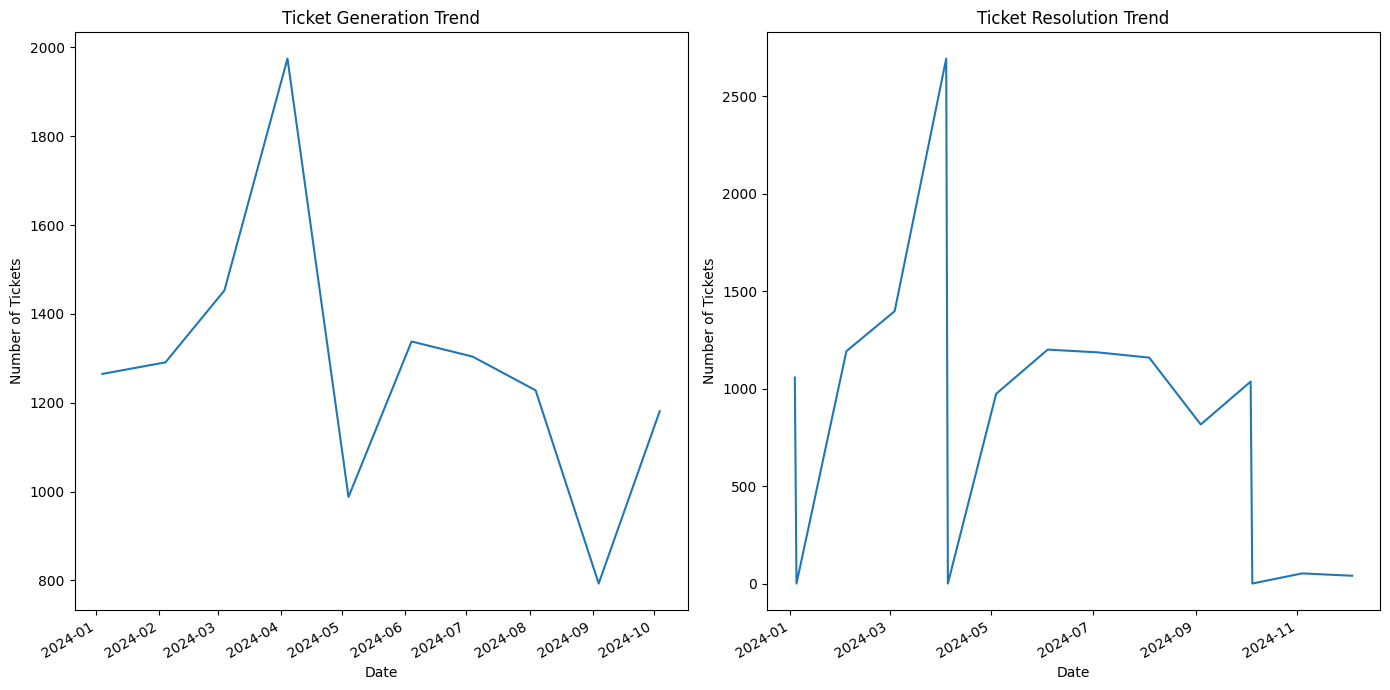

In [7]:

# Ticket generation and resolution trend
ticket_generation_trend = df['Created Date'].value_counts().sort_index()
ticket_resolution_trend = df['Resolved Date'].value_counts().sort_index()

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
ticket_generation_trend.plot(kind='line', title='Ticket Generation Trend')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')

plt.subplot(1, 2, 2)
ticket_resolution_trend.plot(kind='line', title='Ticket Resolution Trend')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')

plt.tight_layout()
plt.show()


In [10]:
df['Resolved Date'] = pd.to_datetime(df['Resolved Date'], errors='coerce')
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Created Time'] = pd.to_datetime(df['Created Time'], format='%H:%M:%S', errors='coerce').dt.time
df['First Response Time'] = pd.to_datetime(df['First Response Time'], format='%H:%M:%S', errors='coerce').dt.time
df['Resolved Time'] = pd.to_datetime(df['Resolved Time'], format='%H:%M:%S', errors='coerce').dt.time

# Combine date and time columns
df['Created DateTime'] = df.apply(lambda row: pd.Timestamp.combine(row['Created Date'], row['Created Time']) if not pd.isnull(row['Created Time']) else pd.NaT, axis=1)
df['First Response DateTime'] = df.apply(lambda row: pd.Timestamp.combine(row['Created Date'], row['First Response Time']) if not pd.isnull(row['First Response Time']) else pd.NaT, axis=1)
df['Resolved DateTime'] = df.apply(lambda row: pd.Timestamp.combine(row['Resolved Date'], row['Resolved Time']) if not pd.isnull(row['Resolved Time']) else pd.NaT, axis=1)


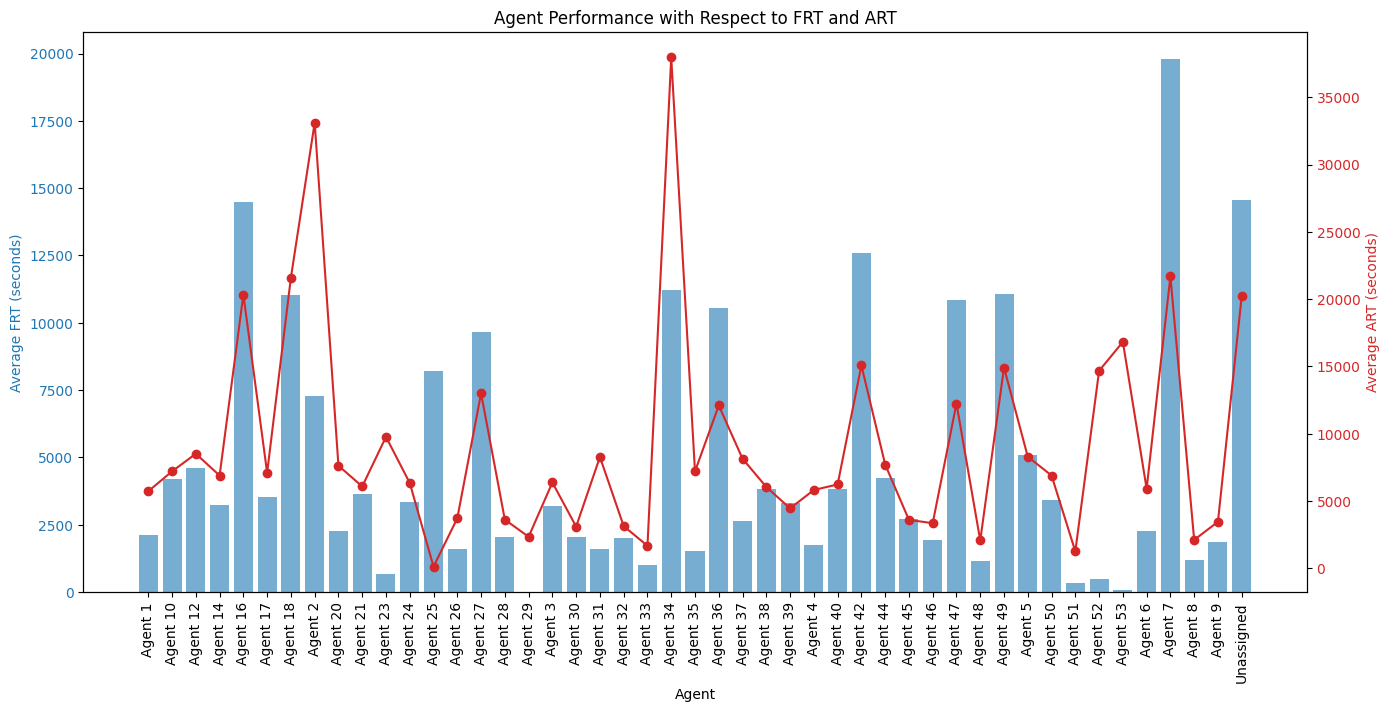

In [14]:

# Calculate FRT and ART and Group by agent and calculate average FRT and ART
df['FRT_seconds'] = (df['First Response DateTime'] - df['Created DateTime']).dt.total_seconds()
df['ART_seconds'] = (df['Resolved DateTime'] - df['Created DateTime']).dt.total_seconds()

df = df[(df['FRT_seconds'] >= 0) & (df['FRT_seconds'] < 86400)]
df = df[(df['ART_seconds'] >= 0) & (df['ART_seconds'] < 604800)]

agent_performance = df.groupby('Assigned To').agg({
    'FRT_seconds': 'mean',
    'ART_seconds': 'mean',
    'Ticket ID': 'count'
}).reset_index()
agent_performance.columns = ['Agent', 'Average FRT (seconds)', 'Average ART (seconds)', 'Number of Tickets']

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Agent')
ax1.set_ylabel('Average FRT (seconds)', color=color)
ax1.bar(agent_performance['Agent'], agent_performance['Average FRT (seconds)'], color=color, alpha=0.6, label='Average FRT')
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average ART (seconds)', color=color)
ax2.plot(agent_performance['Agent'], agent_performance['Average ART (seconds)'], color=color, marker='o', label='Average ART')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Agent Performance with Respect to FRT and ART')
plt.show()


In [18]:

df = df[df['Assigned To'] != 'Unassigned']

agent_performance = agent_performance[agent_performance['Number of Tickets'] >= 5]
#best agent and worst agent
best_agent_frt = agent_performance.loc[agent_performance['Average FRT (seconds)'].idxmin()]
best_agent_art = agent_performance.loc[agent_performance['Average ART (seconds)'].idxmin()]

worst_agent_frt = agent_performance.loc[agent_performance['Average FRT (seconds)'].idxmax()]
worst_agent_art = agent_performance.loc[agent_performance['Average ART (seconds)'].idxmax()]


print("Best Agent based on FRT:", best_agent_frt)
print("Best Agent based on ART:", best_agent_art)
print("Worst Agent based on FRT:", worst_agent_frt)
print("Worst Agent based on ART:", worst_agent_art)

Best Agent based on FRT: Agent                       Agent 29
Average FRT (seconds)            0.0
Average ART (seconds)    2347.722222
Number of Tickets                 18
Name: 16, dtype: object
Best Agent based on ART: Agent                       Agent 33
Average FRT (seconds)    1010.841758
Average ART (seconds)    1677.953846
Number of Tickets                455
Name: 21, dtype: object
Worst Agent based on FRT: Agent                        Agent 42
Average FRT (seconds)         12609.5
Average ART (seconds)    15072.916667
Number of Tickets                  12
Name: 30, dtype: object
Worst Agent based on ART: Agent                        Agent 42
Average FRT (seconds)         12609.5
Average ART (seconds)    15072.916667
Number of Tickets                  12
Name: 30, dtype: object


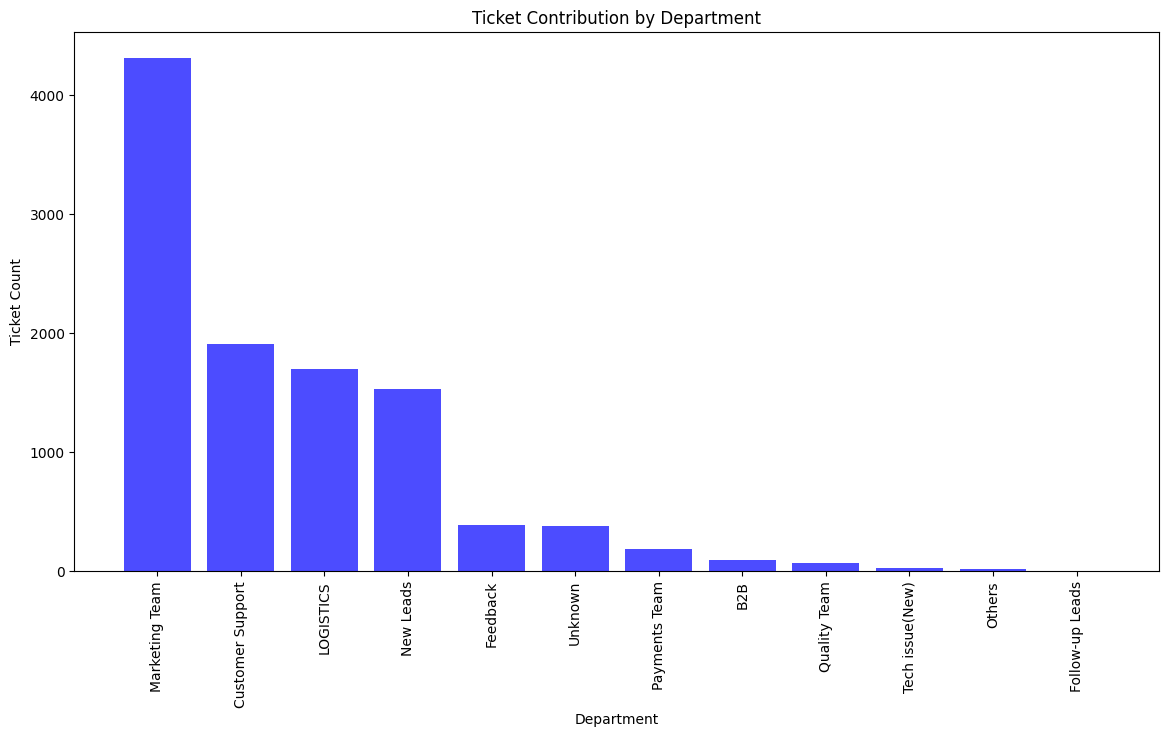

(          Department  Ticket Count
 0     Marketing Team          4314
 1   Customer Support          1904
 2          LOGISTICS          1700
 3          New Leads          1531
 4           Feedback           385
 5            Unknown           379
 6      Payments Team           182
 7                B2B            95
 8       Quality Team            65
 9    Tech issue(New)            29
 10            Others            17
 11   Follow-up Leads             1,
             Issue Category  Ticket Count
 0             Call Tickets          4121
 1         Details verified          1196
 2            Late Delivery           597
 3           Indent Related           515
 4                Boys info           502
 ..                     ...           ...
 61              Tech Error             1
 62  wrong indent delivered             1
 63              Ghee Pouch             1
 64             Stores Info             1
 65                   Agent             1
 
 [66 rows x 2 columns])

In [32]:
# Ticket contribution by Department
department_contribution = df['Department'].value_counts().reset_index()
department_contribution.columns = ['Department', 'Ticket Count']

plt.figure(figsize=(14, 7))
plt.bar(department_contribution['Department'], department_contribution['Ticket Count'], color='blue', alpha=0.7)
plt.xlabel('Department')
plt.ylabel('Ticket Count')
plt.title('Ticket Contribution by Department')
plt.xticks(rotation=90)
plt.show()


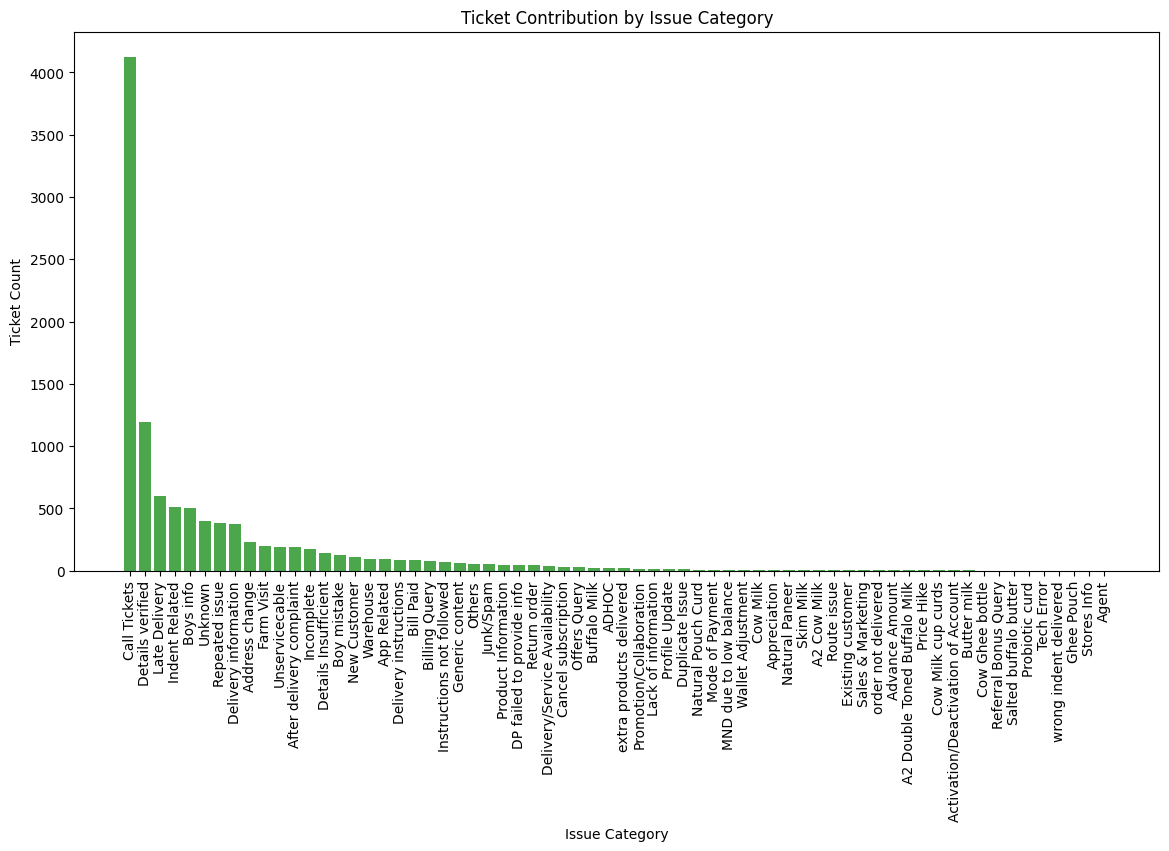

In [31]:

# Ticket contribution by Issue Category
issue_category_contribution = df['Issue Category'].value_counts().reset_index()
issue_category_contribution.columns = ['Issue Category', 'Ticket Count']

plt.figure(figsize=(14, 7))
plt.bar(issue_category_contribution['Issue Category'], issue_category_contribution['Ticket Count'], color='green', alpha=0.7)
plt.xlabel('Issue Category')
plt.ylabel('Ticket Count')
plt.title('Ticket Contribution by Issue Category')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Filter out negative and extremely high values
df = df[(df['FRT_seconds'] >= 0) & (df['FRT_seconds'] < 86400)]
df = df[(df['ART_seconds'] >= 0) & (df['ART_seconds'] < 604800)]
# Group by department and calculate average FRT and ART
dept_metrics = df.groupby('Department').agg({
    'FRT_seconds': 'mean',
    'ART_seconds': 'mean',
    'Ticket ID': 'count'
}).reset_index()
dept_metrics.columns = ['Department', 'Total Tickets', 'Average FRT (seconds)', 'Average ART (seconds)']

# Identify the best performing department based on FRT and ART
best_department_frt = dept_metrics.loc[dept_metrics['Average FRT (seconds)'].idxmin()]
best_department_art = dept_metrics.loc[dept_metrics['Average ART (seconds)'].idxmin()]

best_department_frt, best_department_art

(Department                 Feedback
 Total Tickets              1.337662
 Average FRT (seconds)    335.407792
 Average ART (seconds)           385
 Name: 2, dtype: object,
 Department               Follow-up Leads
 Total Tickets                        0.0
 Average FRT (seconds)             1750.0
 Average ART (seconds)                  1
 Name: 3, dtype: object)

In [23]:
# Group by issue category and calculate metrics
issue_metrics = df.groupby('Issue Category').agg({
    'Ticket ID': 'count',
    'FRT_seconds': 'mean',
    'ART_seconds': 'mean'
}).reset_index()


issue_metrics.columns = ['Issue Category', 'Total Tickets', 'Average FRT (seconds)', 'Average ART (seconds)']


In [ ]:

print(dept_metrics)
print(issue_metrics)

          Department  Total Tickets  Average FRT (seconds)  \
0                B2B   14565.105263           11802.000000   
1   Customer Support    2393.982143            5685.268908   
2           Feedback       1.337662             335.407792   
3    Follow-up Leads       0.000000            1750.000000   
4          LOGISTICS    4045.739412            8851.993529   
5     Marketing Team      81.173621            1596.032221   
6          New Leads    7378.285434            8011.203135   
7             Others   47707.411765           48170.176471   
8      Payments Team     792.593407            4560.087912   
9       Quality Team    1471.415385           18923.123077   
10   Tech issue(New)    2510.620690           10250.413793   
11           Unknown    3451.873351            7104.192612   

    Average ART (seconds)  
0                      95  
1                    1904  
2                     385  
3                       1  
4                    1700  
5                    4314

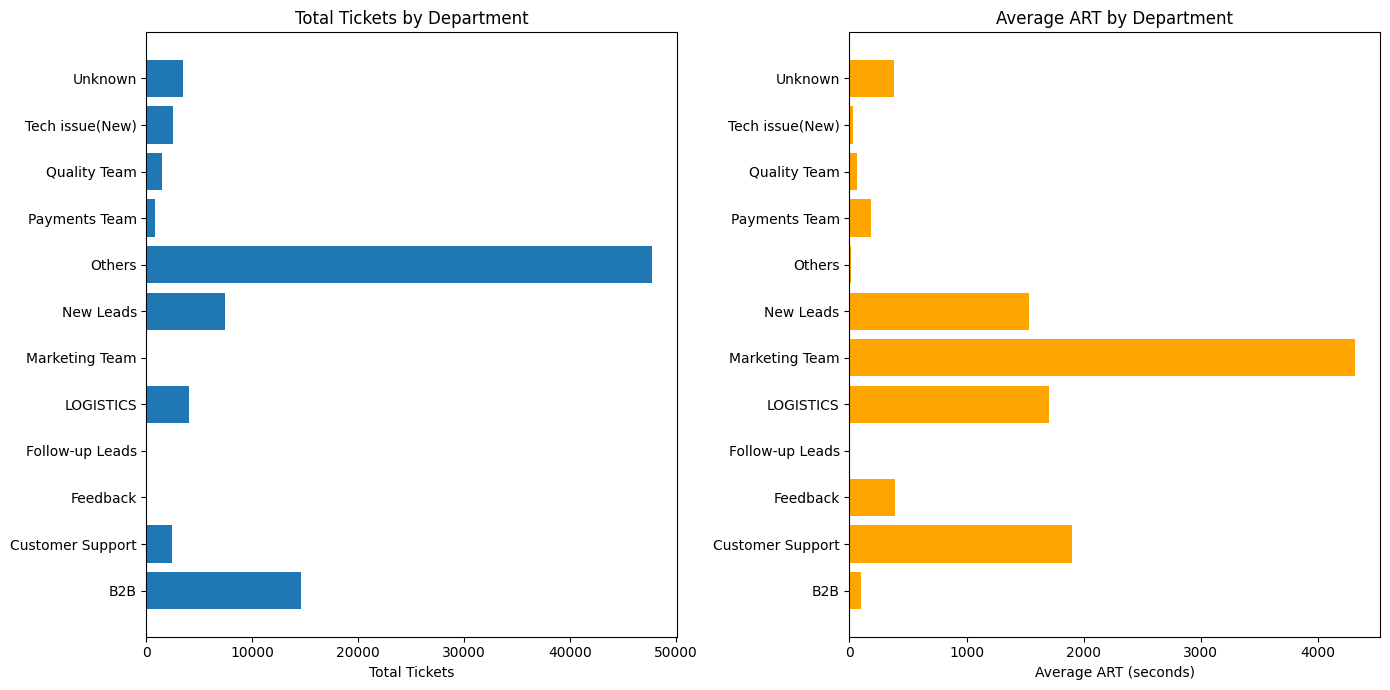

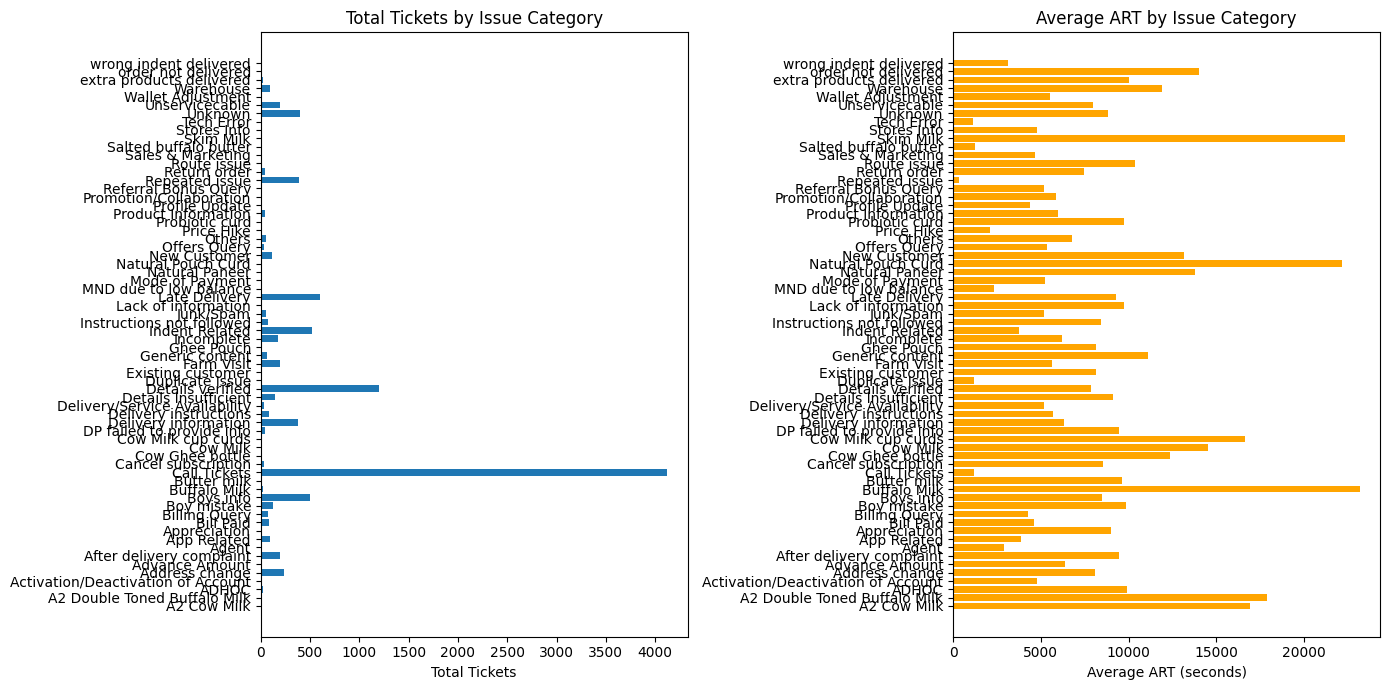

In [24]:

# Plot department metrics
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.barh(dept_metrics['Department'], dept_metrics['Total Tickets'])
plt.xlabel('Total Tickets')
plt.title('Total Tickets by Department')

plt.subplot(1, 2, 2)
plt.barh(dept_metrics['Department'], dept_metrics['Average ART (seconds)'], color='orange')
plt.xlabel('Average ART (seconds)')
plt.title('Average ART by Department')

plt.tight_layout()
plt.show()

# Plot issue category metrics
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.barh(issue_metrics['Issue Category'], issue_metrics['Total Tickets'])
plt.xlabel('Total Tickets')
plt.title('Total Tickets by Issue Category')

plt.subplot(1, 2, 2)
plt.barh(issue_metrics['Issue Category'], issue_metrics['Average ART (seconds)'], color='orange')
plt.xlabel('Average ART (seconds)')
plt.title('Average ART by Issue Category')

plt.tight_layout()
plt.show()


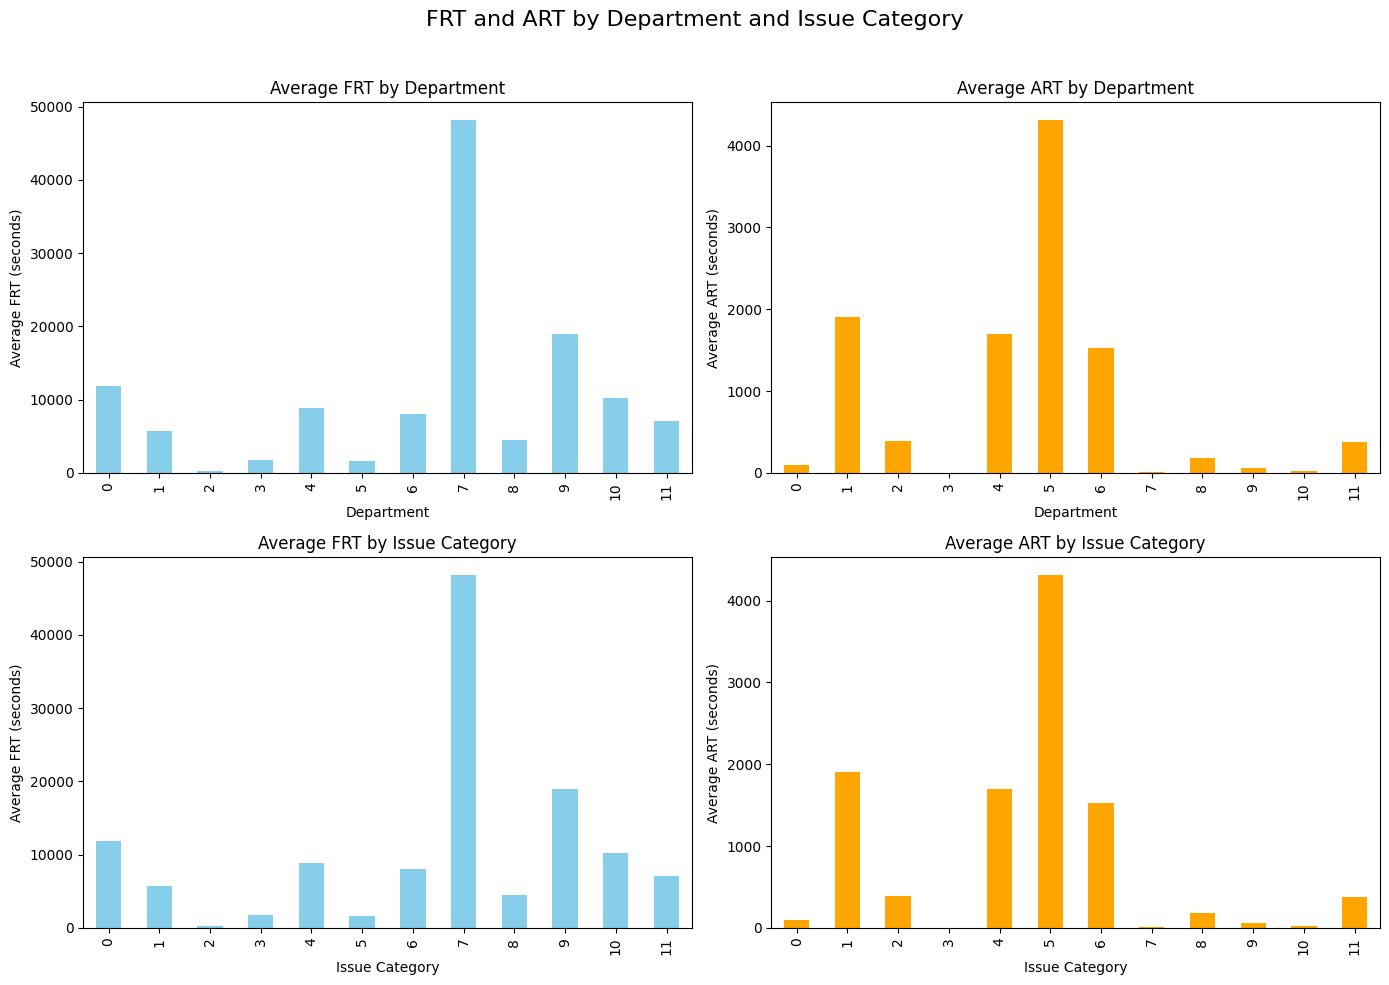

In [26]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('FRT and ART by Department and Issue Category', fontsize=16)

# Plot Average FRT by Department
dept_metrics['Average FRT (seconds)'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average FRT by Department')
axes[0, 0].set_ylabel('Average FRT (seconds)')
axes[0, 0].set_xlabel('Department')

# Plot Average ART by Department
dept_metrics['Average ART (seconds)'].plot(kind='bar', ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Average ART by Department')
axes[0, 1].set_ylabel('Average ART (seconds)')
axes[0, 1].set_xlabel('Department')

# Plot Average FRT by Issue Category
dept_metrics['Average FRT (seconds)'].plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Average FRT by Issue Category')
axes[1, 0].set_ylabel('Average FRT (seconds)')
axes[1, 0].set_xlabel('Issue Category')

# Plot Average ART by Issue Category
dept_metrics['Average ART (seconds)'].plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Average ART by Issue Category')
axes[1, 1].set_ylabel('Average ART (seconds)')
axes[1, 1].set_xlabel('Issue Category')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()